In [1]:
import pandas as pd
file_targets = 'data/psRNATargetJob-1550513938322843.txt.csv'
file_deg = 'data/DEG-normalized.csv'

In [2]:
df_deg = pd.read_csv(file_deg, index_col=False, sep=',', comment='#')
genes = df_deg.gene.tolist() 
df_deg['gene_name'] = df_deg['gene'].str.split(":").str[1]
print(len(genes))

3019


In [3]:
df_t = pd.read_csv(file_targets, sep='\t', comment='#')
len(df_t.index)

769983

In [4]:
df_t.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,Target_aligned_fragment,Inhibition,Target_Desc.
0,UUGUACCAACUGUAAACUCGU,TraesCS3B02G063200,3.5,-1.0,1,21,4286,4306,UUGUACCAACUGUAAACUCGU,ACGCGUUUGCAGUUCGUGCAA,Cleavage,seq:3B start:35459914 end:35464261 strand:+
1,UUGUACCAACUGUAAACUCGU,TraesCS7D02G183600,4.0,-1.0,1,21,12367,12387,UUGUACCAACUGUAAACUCGU,ACGAUUUUACAGUUGUUAUAU,Cleavage,seq:7D start:136994147 end:137010843 strand:-


In [ ]:
len(df_t['Target_Acc.'].unique())

In [18]:
vc = df_t['Target_Acc.'].value_counts()
df_count = vc.rename_axis('unique_values').reset_index(name='counts')
df_count.head()

,unique_values,counts
0,TraesCS6B02G002100,2842
1,TraesCS6D02G168300,1832
2,TraesCS5A02G173000,1502
3,TraesCS5B02G109300,1413
4,TraesCS4D02G027800,1323


In [19]:
vc = df_t['miRNA_Acc.'].value_counts()
vc.rename_axis('unique_values').reset_index(name='counts').head()

,unique_values,counts
0,UUUGUAUUUUUUGGUUUGUUU,378
1,GAGGAAGGAGAGGAUGAGGCC,370
2,UUUGUUUUCUUCUUGUUCAGU,352
3,Cluster_22046,347
4,UGGUUGUUUUUUGUUGUUGAU,318


In [20]:
df_res = pd.merge(df_count, df_deg[['gene_name', 'log2FoldChange']], left_on='unique_values', right_on='gene_name')
df_res.head()



,unique_values,counts,gene_name,log2FoldChange
0,TraesCS6B02G002100,2842,TraesCS6B02G002100,-6.133970
1,TraesCS6D02G168300,1832,TraesCS6D02G168300,-0.763316
2,TraesCS5A02G173000,1502,TraesCS5A02G173000,0.771725
3,TraesCS5B02G109300,1413,TraesCS5B02G109300,1.124296
4,TraesCS4D02G027800,1323,TraesCS4D02G027800,0.975104


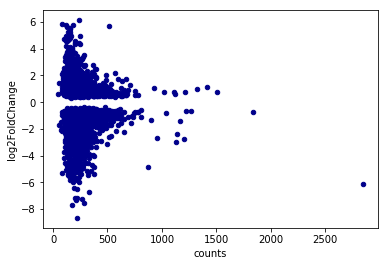

In [22]:
df_res.plot.scatter(x='counts', y='log2FoldChange',c='DarkBlue')
